# Data Analysis

### Imports

In [1]:
import os
import datetime as dt

from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

mpl.rcParams['figure.figsize'] = (15, 6)
mpl.rcParams['axes.grid'] = False

### Moose Data

In [2]:
# Retrieve Data
raw_moose_data = pd.read_csv(r'CSVFiles/RawCSV/ABoVE_ Boutin Alberta Moose.csv')
raw_moose_data['timestamp'] = pd.DatetimeIndex(raw_moose_data['timestamp'])

# Remove meta-data and individual string data
raw_moose_data.drop(columns=['event-id', 'visible', 'sensor-type', 'individual-taxon-canonical-name', 'individual-local-identifier', 'study-name'], inplace=True)
raw_moose_data.head()

,timestamp,location-long,location-lat,external-temperature,gps:dop,gps:fix-type,height-above-ellipsoid,tag-voltage,tag-local-identifier
0,2010-03-06 01:00:54,-111.399967,57.371726,7.0,3.6,3,310.47,3360.0,yl1
1,2010-03-06 04:00:53,-111.399996,57.371528,6.0,4.0,3,303.22,3360.0,yl1
2,2010-03-06 07:00:53,-111.400058,57.371440,4.0,4.6,3,290.53,3360.0,yl1
3,2010-03-06 10:02:22,-111.399977,57.372240,2.0,3.2,3,310.64,3280.0,yl1
4,2010-03-06 13:01:07,-111.400137,57.372234,2.0,2.4,3,314.64,3280.0,yl1


In [3]:
# Identify Data
raw_moose_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133519 entries, 0 to 133518
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   timestamp               133519 non-null  datetime64[ns]
 1   location-long           133519 non-null  float64       
 2   location-lat            133519 non-null  float64       
 3   external-temperature    133519 non-null  float64       
 4   gps:dop                 133519 non-null  float64       
 5   gps:fix-type            133519 non-null  int64         
 6   height-above-ellipsoid  133519 non-null  float64       
 7   tag-voltage             133519 non-null  float64       
 8   tag-local-identifier    133519 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 9.2+ MB


In [4]:
# Provide count, mean, 5-point summary, and standard deviation of moose data
raw_moose_data.describe().T

,count,mean,min,25%,50%,75%,max,std
timestamp,133519,2011-04-17 01:17:58.933694976,2010-03-06 01:00:25,2010-08-30 16:01:12,2011-03-15 16:00:44,2011-11-10 01:00:54,2012-10-28 16:01:23,NaN
location-long,133519.0,-111.483126,-111.998902,-111.572225,-111.432301,-111.392478,-111.167725,0.161564
location-lat,133519.0,57.070555,56.747153,56.935547,56.99026,57.232397,57.511772,0.19653
external-temperature,133519.0,8.095664,-38.0,0.0,10.0,18.0,42.0,12.484693
gps:dop,133519.0,3.511012,1.0,2.4,3.0,4.0,25.0,1.984525
gps:fix-type,133519.0,2.985433,2.0,3.0,3.0,3.0,3.0,0.119813
height-above-ellipsoid,133519.0,284.405035,-2643.1,247.61,294.55,316.41,3499.69,49.539102
tag-voltage,133519.0,3348.600574,2960.0,3280.0,3360.0,3360.0,3520.0,64.563727


#### Denote different moose lifespans

In [5]:
for moose in raw_moose_data['tag-local-identifier'].unique():
    specific_moose = raw_moose_data[raw_moose_data['tag-local-identifier'] == moose]
    print(f'{moose}: From {min(specific_moose['timestamp'])} to {max(specific_moose['timestamp'])}: {max(specific_moose['timestamp']) - min(specific_moose['timestamp'])}')

print(f'There are {len(raw_moose_data['tag-local-identifier'].unique())} moose')

yl1: From 2010-03-06 01:00:54 to 2012-10-28 16:01:23: 967 days 15:00:29
yl10: From 2010-03-06 01:00:43 to 2012-10-06 10:02:12: 945 days 09:01:29
yl11: From 2010-03-06 01:00:44 to 2012-10-27 22:02:39: 966 days 21:01:55
yl12: From 2010-03-06 01:01:24 to 2011-05-15 16:00:54: 435 days 14:59:30
yl13: From 2010-03-06 01:00:25 to 2012-10-28 16:00:55: 967 days 15:00:30
yl14: From 2010-03-06 01:01:51 to 2011-10-02 16:01:11: 575 days 14:59:20
yl15: From 2010-03-06 01:01:12 to 2012-10-27 19:00:50: 966 days 17:59:38
yl16: From 2010-03-06 01:00:48 to 2012-10-28 13:00:54: 967 days 12:00:06
yl17: From 2010-03-06 01:01:18 to 2012-04-18 16:02:51: 774 days 15:01:33
yl18: From 2010-03-06 01:00:54 to 2010-12-28 22:00:43: 297 days 20:59:49
yl19: From 2010-03-06 01:00:53 to 2010-05-05 22:01:41: 60 days 21:00:48
yl2: From 2010-03-06 01:00:53 to 2012-04-10 19:02:47: 766 days 18:01:54
yl20: From 2010-03-06 01:00:43 to 2012-10-27 19:00:53: 966 days 18:00:10
yl21: From 2010-03-06 01:00:54 to 2011-06-23 01:01:28:

In [6]:
print(f'Number of Moose: {len(raw_moose_data['tag-local-identifier'].unique())}')

Number of Moose: 25


#### Plot out the mooses' locations

[]

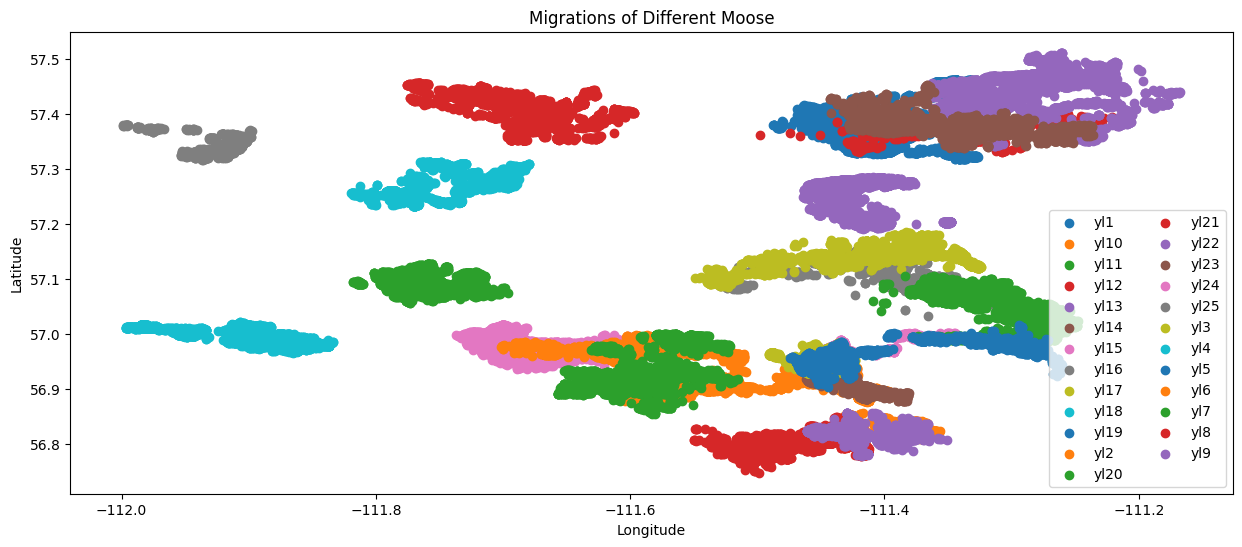

In [7]:
for moose in raw_moose_data['tag-local-identifier'].unique():        
    specific_moose = raw_moose_data[raw_moose_data['tag-local-identifier'] == moose]
    plt.scatter(specific_moose['location-long'], specific_moose['location-lat'], label=moose)

plt.title('Migrations of Different Moose')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(loc='best', ncols=2)
plt.plot()

#### Visualize non-positional to positional variable relationships for a specified moose

,location-long,location-lat,external-temperature,gps:dop,gps:fix-type,height-above-ellipsoid,tag-voltage
location-long,1.000000,0.025648,-0.007385,-0.020630,-0.046375,-0.422606,0.086085
location-lat,0.025648,1.000000,-0.167456,0.096219,-0.086188,0.456077,-0.207539
external-temperature,-0.007385,-0.167456,1.000000,0.063087,-0.030989,-0.282066,0.864673
gps:dop,-0.020630,0.096219,0.063087,1.000000,-0.077985,0.005382,0.032814
gps:fix-type,-0.046375,-0.086188,-0.030989,-0.077985,1.000000,0.029321,0.011446
height-above-ellipsoid,-0.422606,0.456077,-0.282066,0.005382,0.029321,1.000000,-0.301623
tag-voltage,0.086085,-0.207539,0.864673,0.032814,0.011446,-0.301623,1.000000


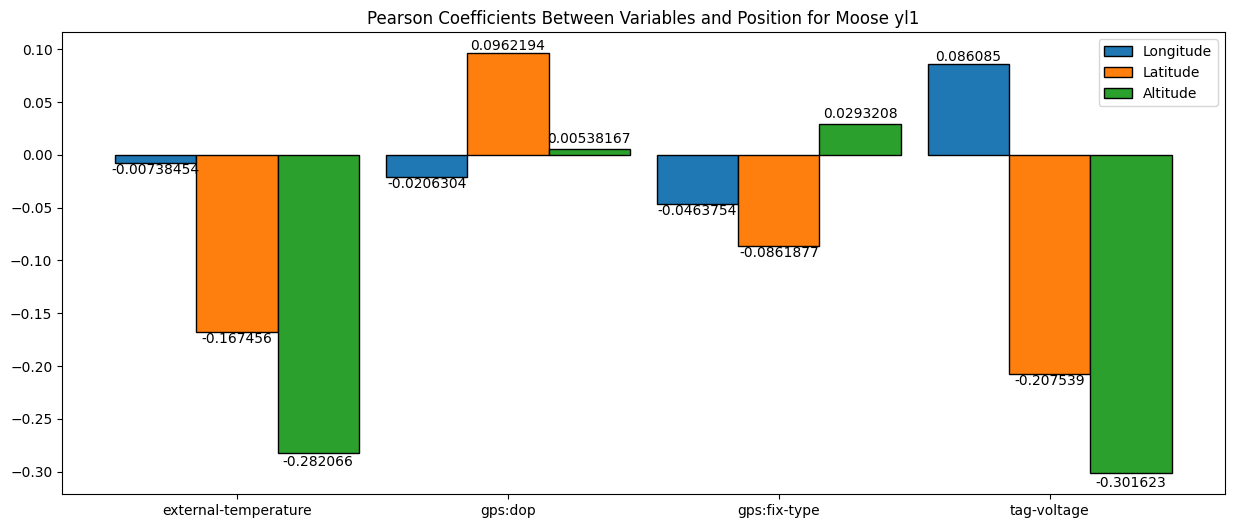

In [8]:
def correlations_of_moose(moose_id):
    if moose_id not in raw_moose_data['tag-local-identifier'].unique():
        raise ValueError()
    
    # Getting specified moose data
    specific_moose = raw_moose_data[raw_moose_data['tag-local-identifier'] == moose_id].set_index('timestamp')
    specific_moose.drop(columns=['tag-local-identifier'], inplace=True)

    # Normalizing moose data and simplifying correlation matrix
    specific_moose = (specific_moose - specific_moose.mean())/specific_moose.std()
    corr_matrix = specific_moose.corr().drop(columns=['location-long', 'location-lat', 'height-above-ellipsoid'])
    corr_matrix.drop(labels=['external-temperature', 'gps:dop', 'gps:fix-type', 'tag-voltage'], inplace=True)

    # Creating bar graphs
    con = plt.bar(x = np.arange(len(corr_matrix.columns)) - 0.3, height=corr_matrix.loc['location-long'], width=0.3, edgecolor='black', label='Longitude')
    plt.bar_label(container=con)

    con = plt.bar(x = np.arange(len(corr_matrix.columns)), height=corr_matrix.loc['location-lat'], width=0.3, edgecolor='black', label='Latitude')
    plt.bar_label(container=con)

    con = plt.bar(x = np.arange(len(corr_matrix.columns)) + 0.3, height=corr_matrix.loc['height-above-ellipsoid'], width=0.3, edgecolor='black', label='Altitude')
    plt.bar_label(container=con, padding=2)

    plt.title(f'Pearson Coefficients Between Variables and Position for Moose {moose_id}')
    plt.xticks(ticks = np.arange(len(corr_matrix.columns)), labels = corr_matrix.columns)
    plt.legend()

    return corr_matrix

correlations_of_moose('yl1')

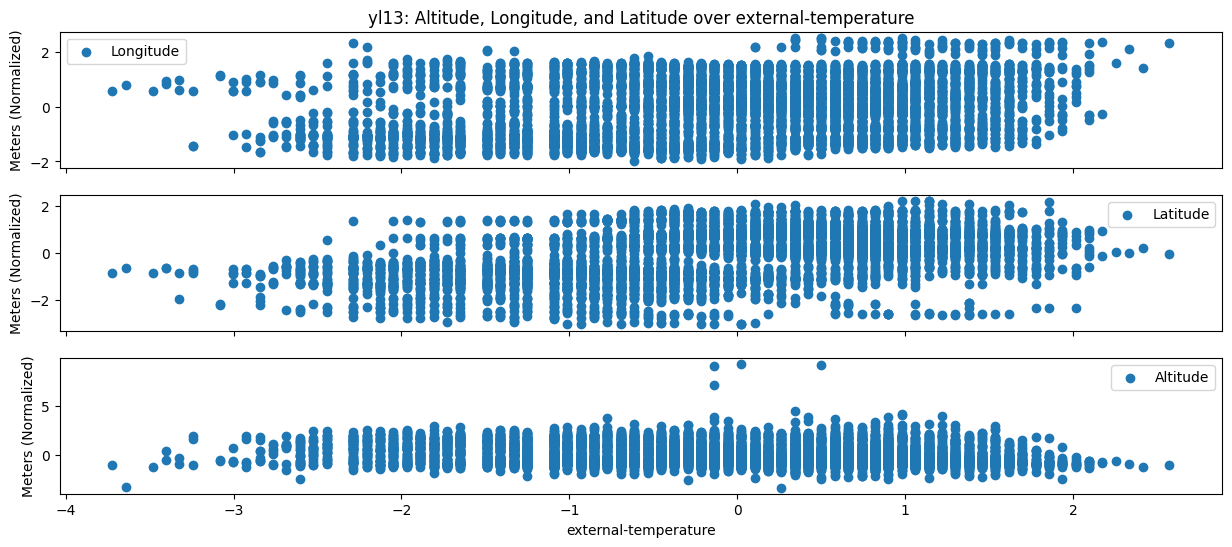

In [9]:
def plotting_for_moose(moose_id, x_axis):
    # Getting and normalizing specified moose data
    specific_moose = raw_moose_data[raw_moose_data['tag-local-identifier'] == moose_id].set_index('timestamp')
    specific_moose.drop(columns=['tag-local-identifier'], inplace=True)

    specific_moose = (specific_moose - specific_moose.mean()) / specific_moose.std()

    # Generating Plots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

    if (x_axis == 'timestamp'):
        ax1.plot(specific_moose.index, specific_moose['location-long'], label='Longitude')
        ax2.plot(specific_moose.index, specific_moose['location-lat'], label='Latitude')
        ax3.plot(specific_moose.index, specific_moose['height-above-ellipsoid'], label='Altitude')
    else:
        ax1.scatter(specific_moose[x_axis], specific_moose['location-long'], label='Longitude')
        ax2.scatter(specific_moose[x_axis], specific_moose['location-lat'], label='Latitude')
        ax3.scatter(specific_moose[x_axis], specific_moose['height-above-ellipsoid'], label='Altitude')

    ax1.set_title(f'{moose_id}: Altitude, Longitude, and Latitude over {x_axis}')
    
    ax1.set_ylabel('Meters (Normalized)')
    ax2.set_ylabel('Meters (Normalized)')
    ax3.set_ylabel('Meters (Normalized)')
    
    plt.xlabel(f'{x_axis}')
    
    ax1.legend()
    ax2.legend()
    ax3.legend()

plotting_for_moose('yl13', 'external-temperature')

### Comparing Interpolated and Regular Cleaning Datasets

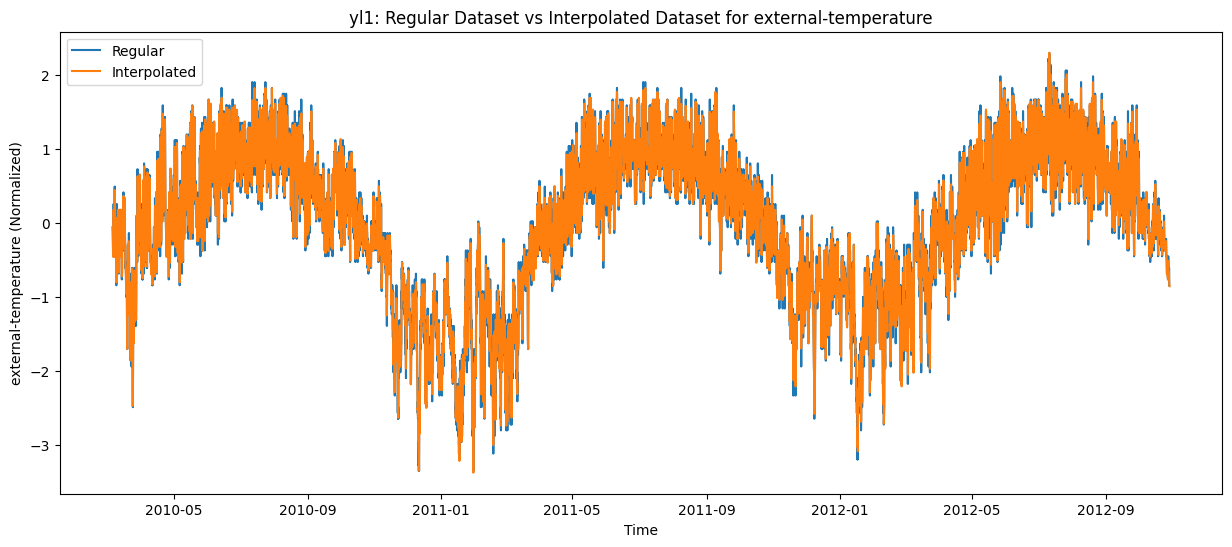

In [10]:
def plotting_comparison_for_moose(moose_id, y_axis):
    # Retrieve data
    regular_dataset = pd.read_csv(f'CSVFiles/CleanCSV/Moose/{moose_id}.csv')
    regular_dataset['timestamp'] = pd.DatetimeIndex(regular_dataset['timestamp'])
    regular_dataset.set_index('timestamp', inplace=True)
    
    interpolated_dataset = pd.read_csv(f'CSVFiles/CleanCSV/Moose/{moose_id}_interpolated.csv')
    interpolated_dataset['timestamp'] = pd.DatetimeIndex(interpolated_dataset['timestamp'])
    interpolated_dataset.set_index('timestamp', inplace=True)

    regular_dataset = (regular_dataset - regular_dataset.mean()) / regular_dataset.std()
    interpolated_dataset = (interpolated_dataset - interpolated_dataset.mean()) / interpolated_dataset.std()
    
    # Create Graph
    fig, (ax1) = plt.subplots(1, 1)

    tag = slice(0, None)
    ax1.plot(regular_dataset.index[tag], regular_dataset[y_axis][tag], label='Regular')
    ax1.plot(interpolated_dataset.index[tag], interpolated_dataset[y_axis][tag], label='Interpolated')
    
    ax1.set_title(f'{moose_id}: Regular Dataset vs Interpolated Dataset for {y_axis}')
    
    ax1.set_ylabel(f'{y_axis} (Normalized)')
    
    plt.xlabel('Time')
    
    ax1.legend()

plotting_comparison_for_moose('yl1', 'external-temperature')

### Deer Data

In [11]:
# Retrieve Data
raw_deer_data = pd.read_csv(r'CSVFiles/RawCSV/EuroDeer_ Roe deer in Italy 2005-2008.csv')
raw_deer_data['timestamp'] = pd.DatetimeIndex(raw_deer_data['timestamp'])

# Remove meta-data and individual string data
raw_deer_data.drop(columns=['event-id', 'visible', 'comments', 'manually-marked-outlier', 'sensor-type', 'individual-taxon-canonical-name', 'individual-local-identifier', 'study-name'], inplace=True)
raw_deer_data.head()

,timestamp,location-long,location-lat,external-temperature,height-above-ellipsoid,tag-tech-spec,tag-voltage,tag-local-identifier
0,2005-03-20 16:03:14,11.062086,45.987881,14.0,954.24,6.4,3.44,GSM01438
1,2005-03-20 20:03:06,NaN,NaN,12.0,NaN,25.4,3.44,GSM01438
2,2005-03-21 00:03:06,11.067915,45.989932,12.0,955.11,2.4,3.44,GSM01438
3,2005-03-21 04:01:45,11.067358,45.991270,13.0,954.64,2.0,3.44,GSM01438
4,2005-03-21 08:03:05,NaN,NaN,11.0,NaN,25.4,3.44,GSM01438


In [12]:
# Identify Data
raw_deer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12634 entries, 0 to 12633
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   timestamp               12634 non-null  datetime64[ns]
 1   location-long           11009 non-null  float64       
 2   location-lat            11009 non-null  float64       
 3   external-temperature    12634 non-null  float64       
 4   height-above-ellipsoid  11009 non-null  float64       
 5   tag-tech-spec           12634 non-null  float64       
 6   tag-voltage             12634 non-null  float64       
 7   tag-local-identifier    12634 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 789.8+ KB


In [13]:
# Provide count, mean, 5-point summary, and standard deviation of deer data
raw_deer_data.describe().T

,count,mean,min,25%,50%,75%,max,std
timestamp,12634,2006-07-15 09:26:56.599810048,2005-03-20 16:03:14,2006-01-02 20:03:06,2006-06-13 14:02:24,2006-12-07 07:02:00.249999872,2008-03-15 08:01:37,NaN
location-long,11009.0,11.039203,10.987212,11.022797,11.043813,11.053536,11.096942,0.02567
location-lat,11009.0,46.010475,45.986847,46.006075,46.008981,46.013554,46.056081,0.012578
external-temperature,12634.0,14.898369,-7.0,10.0,15.0,20.0,49.0,6.930908
height-above-ellipsoid,11009.0,1426.953151,655.4,1112.07,1596.93,1632.35,2092.34,308.663133
tag-tech-spec,12634.0,7.684977,0.0,3.2,4.4,7.8,25.4,7.453889
tag-voltage,12634.0,3.443103,2.96,3.44,3.44,3.44,3.52,0.047272


#### Denote different deer lifespans

In [14]:
for deer in raw_deer_data['tag-local-identifier'].unique():
    specific_deer = raw_deer_data[raw_deer_data['tag-local-identifier'] == deer]
    print(f'{deer}: From {min(specific_deer['timestamp'])} to {max(specific_deer['timestamp'])} - {max(specific_deer['timestamp']) - min(specific_deer['timestamp'])}')

print(f'There are {len(raw_deer_data['tag-local-identifier'].unique())} deer')

GSM01438: From 2005-03-20 16:03:14 to 2006-05-27 16:02:25 - 432 days 23:59:11
GSM01508: From 2005-10-23 20:00:53 to 2006-10-28 12:01:18 - 369 days 16:00:25
GSM01511: From 2005-10-21 20:00:47 to 2007-02-09 08:11:24 - 475 days 12:10:37
GSM01512: From 2005-10-18 20:00:54 to 2006-10-29 12:00:49 - 375 days 15:59:55
GSM02927: From 2006-11-12 12:03:04 to 2008-03-15 08:01:37 - 488 days 19:58:33
There are 5 deer


In [15]:
print(f'Number of Deer: {len(raw_deer_data['tag-local-identifier'].unique())}')

Number of Deer: 5


#### Denote the deers' locations

[]

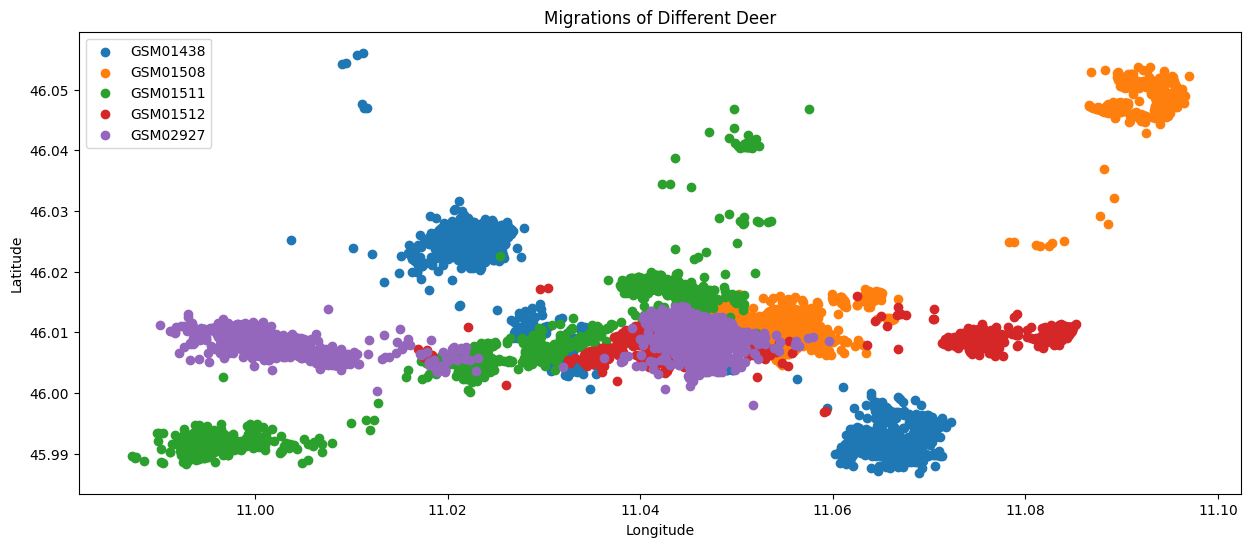

In [16]:
for deer in raw_deer_data['tag-local-identifier'].unique():
    specific_deer = raw_deer_data[raw_deer_data['tag-local-identifier'] == deer]
    plt.scatter(specific_deer['location-long'], specific_deer['location-lat'], label=deer)

plt.title('Migrations of Different Deer')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(loc='best')
plt.plot()

#### Visualize non-positional to positional variable relationships for a specified deer

,external-temperature,tag-tech-spec,tag-voltage
location-long,0.213437,-0.144396,0.128603
location-lat,-0.328008,-0.155605,-0.258469
height-above-ellipsoid,0.220472,-0.148406,0.144128


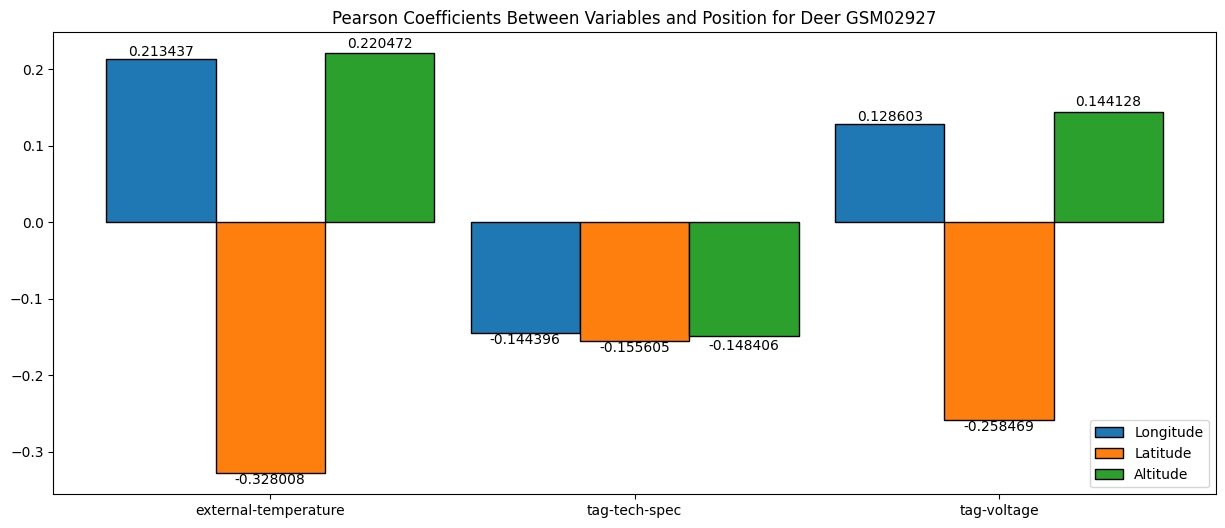

In [17]:
def covariance_of_deer(deer_id):
    if deer_id not in raw_deer_data['tag-local-identifier'].unique():
        raise ValueError()
    
    # Getting specified moose data
    specific_deer = raw_deer_data[raw_deer_data['tag-local-identifier'] == deer_id].set_index('timestamp')
    specific_deer.drop(columns=['tag-local-identifier'], inplace=True)

    # Normalizing moose data and simplifying correlation matrix
    specific_deer = (specific_deer - specific_deer.mean())/specific_deer.std()
    corr_matrix = specific_deer.corr().drop(columns=['location-long', 'location-lat', 'height-above-ellipsoid'])
    corr_matrix.drop(labels=['external-temperature', 'tag-tech-spec', 'tag-voltage'], inplace=True)

    # Creating bar graphs
    con = plt.bar(x = np.arange(len(corr_matrix.columns)) - 0.3, height=corr_matrix.loc['location-long'], width=0.3, edgecolor='black', label='Longitude')
    plt.bar_label(container=con)

    con = plt.bar(x = np.arange(len(corr_matrix.columns)), height=corr_matrix.loc['location-lat'], width=0.3, edgecolor='black', label='Latitude')
    plt.bar_label(container=con)

    con = plt.bar(x = np.arange(len(corr_matrix.columns)) + 0.3, height=corr_matrix.loc['height-above-ellipsoid'], width=0.3, edgecolor='black', label='Altitude')
    plt.bar_label(container=con, padding=2)

    plt.title(f'Pearson Coefficients Between Variables and Position for Deer {deer_id}')
    plt.xticks(ticks = np.arange(len(corr_matrix.columns)), labels = corr_matrix.columns)
    plt.legend(loc='lower right')

    return corr_matrix

covariance_of_deer('GSM02927')

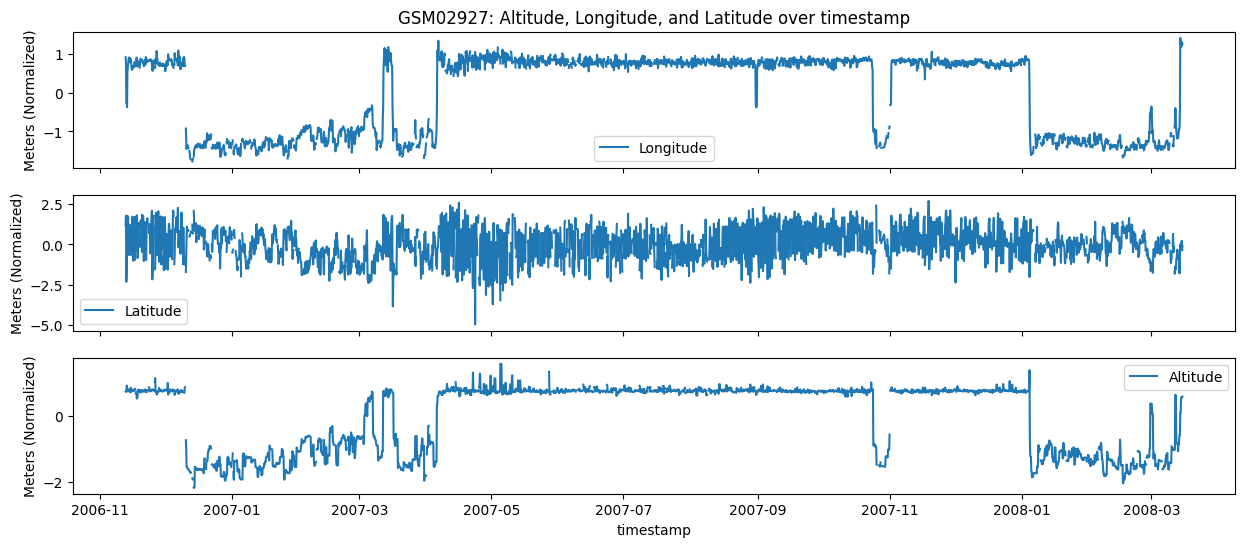

In [18]:
def plotting_for_deer(deer_id, x_axis):
    # Getting and normalizing specified deer data
    specific_deer = raw_deer_data[raw_deer_data['tag-local-identifier'] == deer_id].set_index('timestamp')
    specific_deer.drop(columns='tag-local-identifier', inplace=True)

    specific_deer = (specific_deer - specific_deer.mean()) / specific_deer.std()

    # Generating Plots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

    if (x_axis == 'timestamp'):
        ax1.plot(specific_deer.index, specific_deer['location-long'], label='Longitude')
        ax2.plot(specific_deer.index, specific_deer['location-lat'], label='Latitude')
        ax3.plot(specific_deer.index, specific_deer['height-above-ellipsoid'], label='Altitude')
    else:
        ax1.scatter(specific_deer[x_axis], specific_deer['location-long'], label='Longitude')
        ax1.scatter(specific_deer[x_axis], specific_deer['location-lat'], label='Latitude')
        ax1.scatter(specific_deer[x_axis], specific_deer['height-above-ellipsoid'], label='Altitude')
    
    ax1.set_title(f'{deer_id}: Altitude, Longitude, and Latitude over {x_axis}')
    ax1.set_ylabel('Meters (Normalized)')
    ax2.set_ylabel('Meters (Normalized)')
    ax3.set_ylabel('Meters (Normalized)')

    plt.xlabel(f'{x_axis}')
    
    ax1.legend()
    ax2.legend()
    ax3.legend()

plotting_for_deer('GSM02927', 'timestamp')

### Comparing Interpolated and Regular Cleaning Datasets

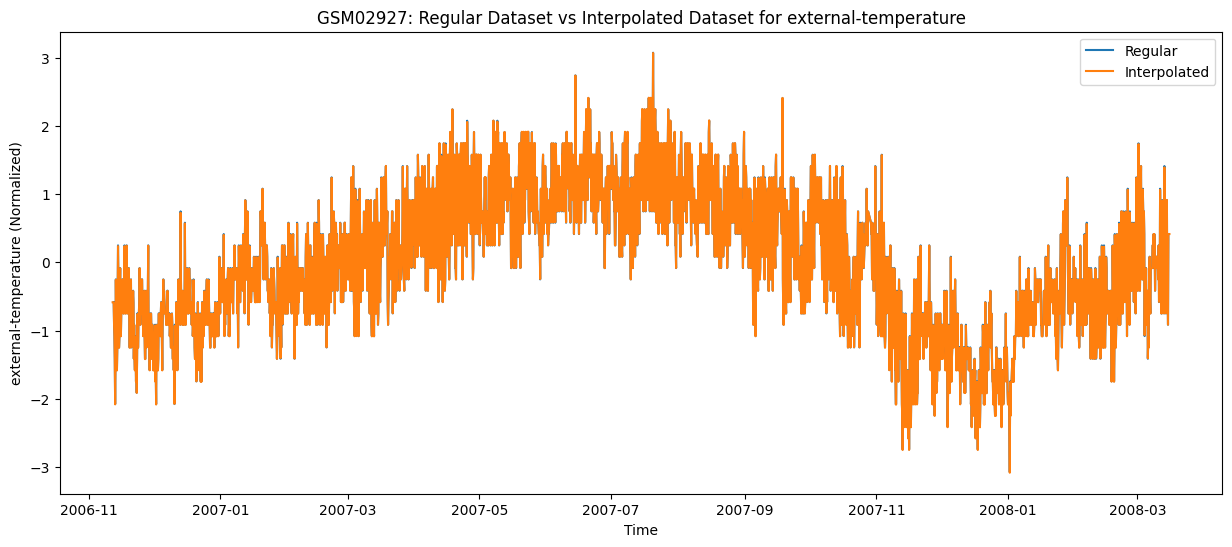

In [19]:
def plotting_comparison_for_deer(deer_id, y_axis):
    # Retrieve data
    regular_dataset = pd.read_csv(f'CSVFiles/CleanCSV/Deer/{deer_id}.csv')
    regular_dataset['timestamp'] = pd.DatetimeIndex(regular_dataset['timestamp'])
    regular_dataset.set_index('timestamp', inplace = True)

    interpolated_dataset = pd.read_csv(f'CSVFiles/CleanCSV/Deer/{deer_id}_interpolated.csv')
    interpolated_dataset['timestamp'] = pd.DatetimeIndex(interpolated_dataset['timestamp'])
    interpolated_dataset.set_index('timestamp', inplace=True)

    regular_dataset = (regular_dataset - regular_dataset.mean()) / regular_dataset.std()
    interpolated_dataset = (interpolated_dataset - interpolated_dataset.mean()) / interpolated_dataset.std()

    # Create Graph
    fig, (ax1) = plt.subplots(1, 1)

    ax1.plot(regular_dataset.index, regular_dataset[y_axis], label='Regular')
    ax1.plot(interpolated_dataset.index, interpolated_dataset[y_axis], label='Interpolated')

    ax1.set_title(f'{deer_id}: Regular Dataset vs Interpolated Dataset for {y_axis}')

    ax1.set_ylabel(f'{y_axis} (Normalized)')

    plt.xlabel('Time')
    
    ax1.legend()

plotting_comparison_for_deer('GSM02927', 'external-temperature')